**Design a learning model using MNIST dataset**
- Evaluate the model using testing dataset
- Prepare 5 handwritten numbers and predict them with the model




In [4]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
import random
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [5]:
from google.colab import files
individual_images = files.upload()

Saving Number2_01.jpeg to Number2_01 (1).jpeg
Saving Number2_02.jpeg to Number2_02 (1).jpeg
Saving Number4_01.jpeg to Number4_01 (1).jpeg
Saving Number4_02.jpeg to Number4_02 (1).jpeg
Saving Number5_01.jpeg to Number5_01 (1).jpeg
Saving Number5_02.jpeg to Number5_02 (1).jpeg


In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("The number of images in training set:", len(X_train))
print("The number of images in testing set:",len(X_test))

print("The size of image：",X_train.shape)

The number of images in training set: 60000
The number of images in testing set: 10000
The size of image： (60000, 28, 28)


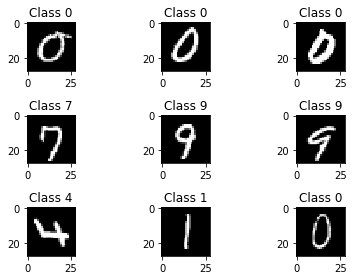

In [7]:
for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [9]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [10]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),    #28x28の行列を784のベクトルに変換
 tf.keras.layers.Dense(128, activation='relu'),    #出力が128次元（ノード128個）の全結合層、活性化関数relu
 tf.keras.layers.Dropout(0.2),                     #DropOutを追加
 tf.keras.layers.Dense(10, activation='softmax')   #出力が10次元の全結合層、活性化関数softmax
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 5, batch_size = 32)

Epoch 1/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3393 - accuracy: 0.9027 - val_loss: 0.1747 - val_accuracy: 0.9501
Epoch 2/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1631 - accuracy: 0.9521 - val_loss: 0.1316 - val_accuracy: 0.9611
Epoch 3/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1212 - accuracy: 0.9642 - val_loss: 0.1121 - val_accuracy: 0.9671
Epoch 4/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0976 - accuracy: 0.9707 - val_loss: 0.1032 - val_accuracy: 0.9702
Epoch 5/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0806 - accuracy: 0.9745 - val_loss: 0.0972 - val_accuracy: 0.9714


In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 2.44%


In [13]:
from tensorflow.keras import layers, models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [15]:
history = model1.fit(X_train, y_train, validation_split = 0.3, epochs = 10, batch_size = 32)


Epoch 1/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0121 - accuracy: 0.9957 - val_loss: 0.0645 - val_accuracy: 0.9839
Epoch 2/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0702 - val_accuracy: 0.9848
Epoch 3/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0097 - accuracy: 0.9965 - val_loss: 0.0653 - val_accuracy: 0.9848
Epoch 4/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0684 - val_accuracy: 0.9848
Epoch 5/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0660 - val_accuracy: 0.9858
Epoch 6/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0660 - val_accuracy: 0.9868
Epoch 7/10
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0817 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


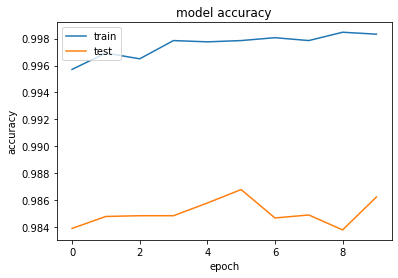

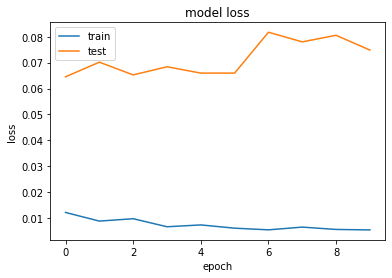

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.23%


In [19]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

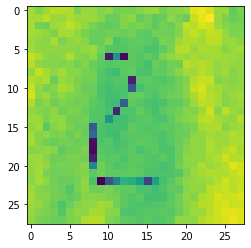

In [22]:
img_sample = load_img('Number2_01.jpeg', color_mode="grayscale", target_size=(28,28))
plt.imshow(img_sample)

In [21]:
def load_images(filename):
  img = load_img(filename, color_mode="grayscale", target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img / 255.0
  return img

In [27]:
img1 = load_images('Number2_01.jpeg')
img2 = load_images('Number2_02.jpeg')
img3 = load_images('Number4_01.jpeg')
img4 = load_images('Number4_02.jpeg')
img5 = load_images('Number5_01.jpeg')
img6 = load_images('Number5_02.jpeg')

digit1 = model1.predict_classes(img1)
digit2 = model1.predict_classes(img2)
digit3 = model1.predict_classes(img3)
digit4 = model1.predict_classes(img4)
digit5 = model1.predict_classes(img5)
digit6 = model1.predict_classes(img6)

print(digit1[0])
print(digit2[0])
print(digit3[0])
print(digit4[0])
print(digit5[0])
print(digit6[0])

8
0
9
5
5
0


## Using model1, only one number: 5 is recognized correctly

In [47]:
from tensorflow.keras import layers, models

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
#model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model2.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout_15 (Dropout)         (None, 3, 3, 64)        

In [48]:
history2 = model2.fit(X_train, y_train, validation_split = 0.33, epochs = 10, batch_size = 32)
#y_train.shape[0]

Epoch 1/10
1257/1257 [==============================] - 44s 35ms/step - loss: 0.2778 - accuracy: 0.9118 - val_loss: 0.0698 - val_accuracy: 0.9794
Epoch 2/10
1257/1257 [==============================] - 44s 35ms/step - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 3/10
1257/1257 [==============================] - 45s 35ms/step - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0523 - val_accuracy: 0.9841
Epoch 4/10
1257/1257 [==============================] - 50s 39ms/step - loss: 0.0526 - accuracy: 0.9827 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 5/10
1257/1257 [==============================] - 45s 36ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 6/10
1257/1257 [==============================] - 46s 37ms/step - loss: 0.0396 - accuracy: 0.9870 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 7/10
1257/1257 [==============================] - 46s 36ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0413 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


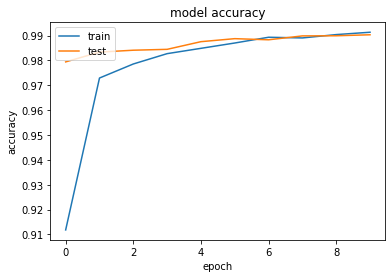

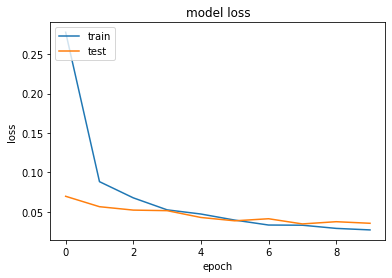

In [60]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.90%


In [52]:
digit1_2 = model2.predict_classes(img1)
digit2_2 = model2.predict_classes(img2)
digit3_2 = model2.predict_classes(img3)
digit4_2 = model2.predict_classes(img4)
digit5_2 = model2.predict_classes(img5)
digit6_2 = model2.predict_classes(img6)

print(digit1_2[0])
print(digit2_2[0])
print(digit3_2[0])
print(digit4_2[0])
print(digit5_2[0])
print(digit6_2[0])

1
8
4
4
1
4


## With two additional convolutional layers, model2 recognized two of the number 4 correctly.

In [56]:
from tensorflow.keras import layers, models

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.3))
model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.3))
model3.add(layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model3.add(layers.Dropout(0.3))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model3.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_22 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 64)        

In [57]:
history3 = model3.fit(X_train, y_train, validation_split = 0.33, epochs = 10, batch_size = 32)


Epoch 1/10
1257/1257 [==============================] - 52s 41ms/step - loss: 0.3738 - accuracy: 0.8777 - val_loss: 0.0753 - val_accuracy: 0.9769
Epoch 2/10
1257/1257 [==============================] - 51s 41ms/step - loss: 0.1212 - accuracy: 0.9633 - val_loss: 0.0600 - val_accuracy: 0.9811
Epoch 3/10
1257/1257 [==============================] - 51s 41ms/step - loss: 0.0915 - accuracy: 0.9719 - val_loss: 0.0456 - val_accuracy: 0.9854
Epoch 4/10
1257/1257 [==============================] - 50s 40ms/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.0424 - val_accuracy: 0.9872
Epoch 5/10
1257/1257 [==============================] - 51s 40ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0413 - val_accuracy: 0.9864
Epoch 6/10
1257/1257 [==============================] - 50s 40ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0404 - val_accuracy: 0.9878
Epoch 7/10
1257/1257 [==============================] - 51s 40ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0350 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


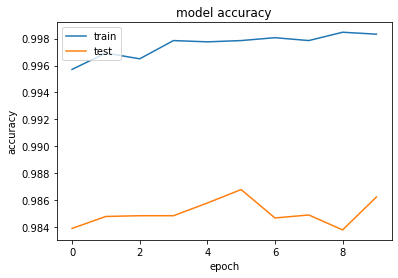

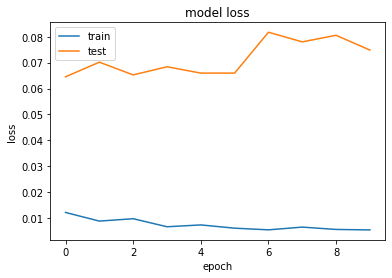

Baseline Error: 0.86%


In [59]:
# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores = model3.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))



In [61]:
digit1_3 = model3.predict_classes(img1)
digit2_3 = model3.predict_classes(img2)
digit3_3 = model3.predict_classes(img3)
digit4_3 = model3.predict_classes(img4)
digit5_3 = model3.predict_classes(img5)
digit6_3 = model3.predict_classes(img6)

print(digit1_3[0])
print(digit2_3[0])
print(digit3_3[0])
print(digit4_3[0])
print(digit5_3[0])
print(digit6_3[0])

1
8
9
1
1
8


In model3, the one more convolutional layer does not help much and the performance is worse than model1; thus the model2 is the best. 